In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np



In [2]:
data = pd.read_csv('heart_disease.csv')
data

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [3]:
data3=pd.read_csv("Breast_Cancer.csv")
data3

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [4]:
da=['Race',	'Marital Status']
for i in da:
    data3.drop(i,axis=1,inplace=True)

In [5]:
data3

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [6]:
df=pd.merge(data,data3,on='Age')
df


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,Moderately differentiated,2,Regional,46,Positive,Positive,1,1,105,Alive
1,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,Moderately differentiated,2,Regional,18,Positive,Negative,24,2,80,Alive
2,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,Moderately differentiated,2,Regional,55,Positive,Positive,13,1,95,Alive
3,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,Poorly differentiated,3,Regional,15,Positive,Positive,8,2,79,Alive
4,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,Moderately differentiated,2,Regional,32,Positive,Positive,24,1,91,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631564,38.0,Female,128.0,193.0,Medium,Yes,Yes,Yes,25.111295,No,...,Moderately differentiated,2,Regional,80,Positive,Positive,1,1,95,Alive
631565,38.0,Female,128.0,193.0,Medium,Yes,Yes,Yes,25.111295,No,...,Poorly differentiated,3,Regional,18,Negative,Positive,8,2,91,Alive
631566,38.0,Female,128.0,193.0,Medium,Yes,Yes,Yes,25.111295,No,...,Moderately differentiated,2,Regional,15,Positive,Positive,1,1,93,Alive
631567,38.0,Female,128.0,193.0,Medium,Yes,Yes,Yes,25.111295,No,...,Moderately differentiated,2,Distant,120,Positive,Positive,14,11,50,Alive


In [7]:
df['Heart Disease Status'].head()

0    No
1    No
2    No
3    No
4    No
Name: Heart Disease Status, dtype: object

In [8]:
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,Moderately differentiated,2,Regional,46,Positive,Positive,1,1,105,Alive
1,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,Moderately differentiated,2,Regional,18,Positive,Negative,24,2,80,Alive
2,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,Moderately differentiated,2,Regional,55,Positive,Positive,13,1,95,Alive
3,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,Poorly differentiated,3,Regional,15,Positive,Positive,8,2,79,Alive
4,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,Moderately differentiated,2,Regional,32,Positive,Positive,24,1,91,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631564,38.0,Female,128.0,193.0,Medium,Yes,Yes,Yes,25.111295,No,...,Moderately differentiated,2,Regional,80,Positive,Positive,1,1,95,Alive
631565,38.0,Female,128.0,193.0,Medium,Yes,Yes,Yes,25.111295,No,...,Poorly differentiated,3,Regional,18,Negative,Positive,8,2,91,Alive
631566,38.0,Female,128.0,193.0,Medium,Yes,Yes,Yes,25.111295,No,...,Moderately differentiated,2,Regional,15,Positive,Positive,1,1,93,Alive
631567,38.0,Female,128.0,193.0,Medium,Yes,Yes,Yes,25.111295,No,...,Moderately differentiated,2,Distant,120,Positive,Positive,14,11,50,Alive


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631569 entries, 0 to 631568
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     631569 non-null  float64
 1   Gender                  630508 non-null  object 
 2   Blood Pressure          629847 non-null  float64
 3   Cholesterol Level       629534 non-null  float64
 4   Exercise Habits         629585 non-null  object 
 5   Smoking                 630014 non-null  object 
 6   Family Heart Disease    630652 non-null  object 
 7   Diabetes                629853 non-null  object 
 8   BMI                     630179 non-null  float64
 9   High Blood Pressure     630199 non-null  object 
 10  Low HDL Cholesterol     629562 non-null  object 
 11  High LDL Cholesterol    630079 non-null  object 
 12  Alcohol Consumption     465969 non-null  object 
 13  Stress Level            629960 non-null  object 
 14  Sleep Hours         

Univariate Analysis:

In [29]:
crosstab = pd.crosstab(df['Gender'], df['Diabetes'])
print(crosstab)


Diabetes      No     Yes
Gender                  
Female    156758  158029
Male      157773  156232


<Axes: xlabel='Gender'>

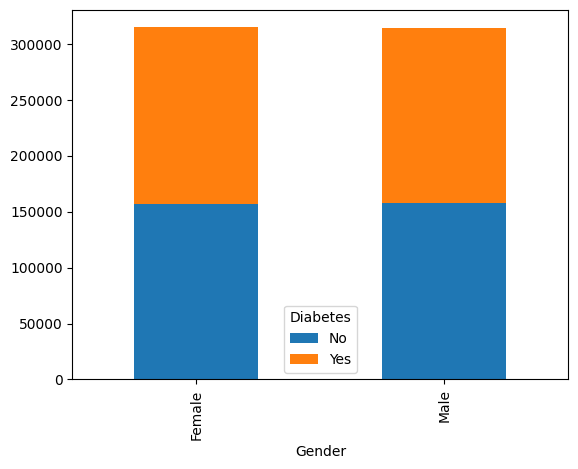

In [30]:
crosstab.plot(kind='bar', stacked=True)


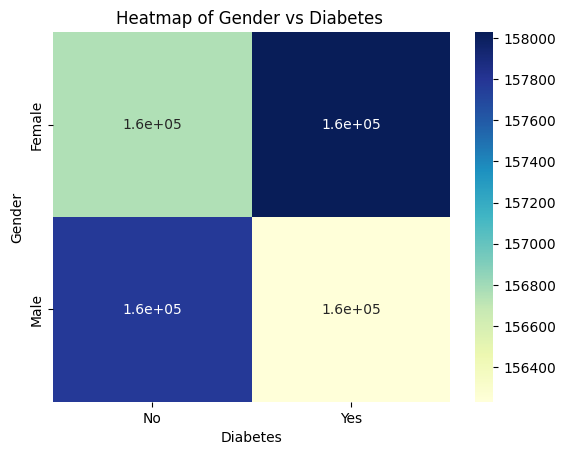

In [32]:


sns.heatmap(crosstab, annot=True, cmap='YlGnBu')
plt.title("Heatmap of Gender vs Diabetes ")
plt.show()


Status                 Alive   Dead
Heart Disease Status               
No                    429072  77944
Yes                   105448  19105


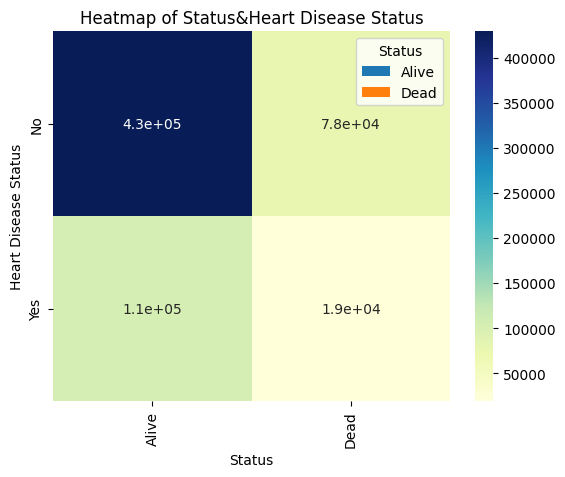

In [33]:
crosstab = pd.crosstab(df['Heart Disease Status'], df['Status'])
print(crosstab)

crosstab.plot(kind='bar', stacked=True)


sns.heatmap(crosstab, annot=True, cmap='YlGnBu')
plt.title("Heatmap of Status&Heart Disease Status")
plt.show()


Status         0      1
Diabetes               
0         266552  48663
1         266492  48146
2           1476    240


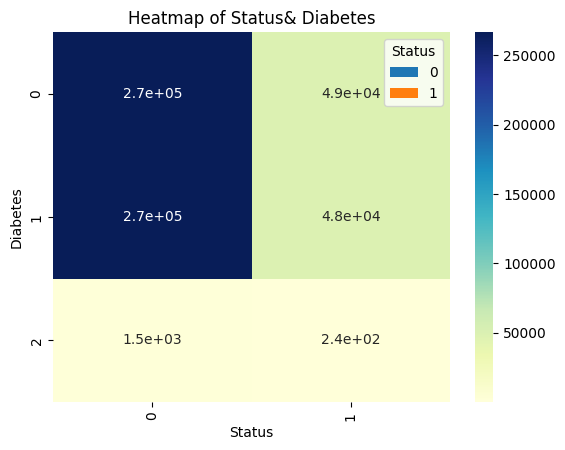

In [71]:
crosstab = pd.crosstab(df['Diabetes'], df['Status'])
print(crosstab)

crosstab.plot(kind='bar', stacked=True)


sns.heatmap(crosstab, annot=True, cmap='YlGnBu')
plt.title("Heatmap of Status& Diabetes")
plt.show()


 Feature Engineering

In [56]:
from sklearn.preprocessing import LabelEncoder

for i in df[['Diabetes', 'Heart Disease Status', 'Status']]:
    
            le = LabelEncoder()
            df[i] = le.fit_transform(df[i])
    

In [57]:
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,0,24.991591,Yes,...,Moderately differentiated,2,Regional,46,Positive,Positive,1,1,105,0
1,56.0,Male,153.0,155.0,High,Yes,Yes,0,24.991591,Yes,...,Moderately differentiated,2,Regional,18,Positive,Negative,24,2,80,0
2,56.0,Male,153.0,155.0,High,Yes,Yes,0,24.991591,Yes,...,Moderately differentiated,2,Regional,55,Positive,Positive,13,1,95,0
3,56.0,Male,153.0,155.0,High,Yes,Yes,0,24.991591,Yes,...,Poorly differentiated,3,Regional,15,Positive,Positive,8,2,79,0
4,56.0,Male,153.0,155.0,High,Yes,Yes,0,24.991591,Yes,...,Moderately differentiated,2,Regional,32,Positive,Positive,24,1,91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631564,38.0,Female,128.0,193.0,Medium,Yes,Yes,1,25.111295,No,...,Moderately differentiated,2,Regional,80,Positive,Positive,1,1,95,0
631565,38.0,Female,128.0,193.0,Medium,Yes,Yes,1,25.111295,No,...,Poorly differentiated,3,Regional,18,Negative,Positive,8,2,91,0
631566,38.0,Female,128.0,193.0,Medium,Yes,Yes,1,25.111295,No,...,Moderately differentiated,2,Regional,15,Positive,Positive,1,1,93,0
631567,38.0,Female,128.0,193.0,Medium,Yes,Yes,1,25.111295,No,...,Moderately differentiated,2,Distant,120,Positive,Positive,14,11,50,0


In [58]:
X = df.drop(['Diabetes', 'Heart Disease Status', 'Status'], axis=1)
y = df[['Diabetes', 'Heart Disease Status', 'Status']]


In [59]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()


Build transformers

In [60]:
# Numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


Train and test Model

In [61]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,BMI,High Blood Pressure,Low HDL Cholesterol,...,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
516488,48.0,Male,135.0,206.0,Low,Yes,Yes,35.243783,Yes,No,...,IIA,Well differentiated,1,Regional,15,Positive,Positive,18,4,106
420225,57.0,Female,121.0,234.0,High,No,No,35.736701,No,No,...,IIA,Moderately differentiated,2,Regional,2,Positive,Negative,16,1,74
134574,46.0,Female,167.0,225.0,Low,Yes,Yes,18.246379,No,No,...,IIA,Moderately differentiated,2,Regional,11,Positive,Positive,12,2,48
198085,41.0,Female,145.0,177.0,High,Yes,No,20.581599,No,No,...,IIA,Well differentiated,1,Regional,20,Positive,Positive,8,1,69
180089,37.0,Male,125.0,253.0,Low,No,Yes,37.641672,Yes,No,...,IIB,Moderately differentiated,2,Regional,50,Positive,Positive,15,2,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,45.0,Male,147.0,255.0,Low,Yes,No,18.787551,No,Yes,...,IIIC,Poorly differentiated,3,Regional,22,Positive,Positive,30,30,44
259178,65.0,Male,174.0,201.0,High,Yes,No,30.480907,No,Yes,...,IIA,Moderately differentiated,2,Regional,15,Positive,Positive,7,2,49
365838,53.0,Male,140.0,162.0,Medium,Yes,No,25.412365,Yes,Yes,...,IIB,Well differentiated,1,Regional,40,Positive,Positive,26,2,65
131932,46.0,Female,162.0,246.0,Low,Yes,Yes,33.266437,Yes,Yes,...,IIIC,Moderately differentiated,2,Regional,65,Positive,Positive,11,10,98


Define and Train All Models

In [62]:
def train_and_evaluate(base_model, model_name):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', MultiOutputClassifier(base_model))
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"\n======= {model_name} Results =======")
    for i, col in enumerate(y.columns):
        print(f"\n--- Classification Report for {col} ---")
        print(classification_report(y_test[col], y_pred[:, i]))
    
    return pipeline


Find ans drop null values

In [65]:
print("NaNs in X_train:", X_train.isnull().sum().sum())
print("NaNs in X_test:", X_test.isnull().sum().sum())


NaNs in X_train: 0
NaNs in X_test: 0


In [64]:
X_train=X_train.dropna()
X_test=X_test.dropna()

In [67]:
print("NaNs in y_train:", y_train.isnull().sum().sum())
print("NaNs in y_test:", y_test.isnull().sum().sum())


NaNs in y_train: 0
NaNs in y_test: 0


In [66]:
y_train=y_train.dropna()
y_test=y_test.dropna()

In [68]:
# Combine features and target to drop rows with NaNs in target
full_data = pd.concat([X, y], axis=1)
full_data = full_data.dropna(subset=['Diabetes', 'Heart Disease Status', 'Status'])

# Split again after dropping
X = full_data.drop(['Diabetes', 'Heart Disease Status', 'Status'], axis=1)
y = full_data[['Diabetes', 'Heart Disease Status', 'Status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), num_cols),

    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])


Machine Learning Algorithms

In [47]:
rf_pipeline = train_and_evaluate(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")



======= Random Forest Results =======

--- Classification Report for Diabetes ---
              precision    recall  f1-score   support

          No       1.00      1.00      1.00     62952
         Yes       1.00      1.00      1.00     63019

    accuracy                           1.00    125971
   macro avg       1.00      1.00      1.00    125971
weighted avg       1.00      1.00      1.00    125971


--- Classification Report for Heart Disease Status ---
              precision    recall  f1-score   support

          No       1.00      1.00      1.00    100921
         Yes       1.00      1.00      1.00     25050

    accuracy                           1.00    125971
   macro avg       1.00      1.00      1.00    125971
weighted avg       1.00      1.00      1.00    125971


--- Classification Report for Status ---
              precision    recall  f1-score   support

       Alive       0.99      1.00      1.00    106732
        Dead       1.00      0.95      0.98     19239

 

In [48]:
logreg_pipeline = train_and_evaluate(LogisticRegression(max_iter=1000), "Logistic Regression")



======= Logistic Regression Results =======

--- Classification Report for Diabetes ---
              precision    recall  f1-score   support

          No       0.52      0.54      0.53     62952
         Yes       0.53      0.51      0.52     63019

    accuracy                           0.52    125971
   macro avg       0.52      0.52      0.52    125971
weighted avg       0.52      0.52      0.52    125971


--- Classification Report for Heart Disease Status ---
              precision    recall  f1-score   support

          No       0.80      1.00      0.89    100921
         Yes       0.00      0.00      0.00     25050

    accuracy                           0.80    125971
   macro avg       0.40      0.50      0.44    125971
weighted avg       0.64      0.80      0.71    125971


--- Classification Report for Status ---
              precision    recall  f1-score   support

       Alive       0.91      0.98      0.94    106732
        Dead       0.78      0.45      0.57     19

In [ ]:
# svm_pipeline = train_and_evaluate(SVC(kernel='rbf', probability=True), "Support Vector Machine")


In [70]:
xgb_pipeline = train_and_evaluate(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost")



======= XGBoost Results =======

--- Classification Report for Diabetes ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     63024
           1       0.99      0.99      0.99     62921
           2       1.00      1.00      1.00       369

    accuracy                           0.99    126314
   macro avg       0.99      0.99      0.99    126314
weighted avg       0.99      0.99      0.99    126314


--- Classification Report for Heart Disease Status ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101337
           1       1.00      0.99      0.99     24977

    accuracy                           1.00    126314
   macro avg       1.00      0.99      1.00    126314
weighted avg       1.00      1.00      1.00    126314


--- Classification Report for Status ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    107001
        

In [51]:
import joblib
joblib.dump(rf_pipeline, 'best_multi_output_model.pkl')


['best_multi_output_model.pkl']